In [106]:
import sys
print(sys.executable)

/anaconda3/bin/python


## Logic Based FizzBuzz Function [Software 1.0]

In [107]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'fizzbuzz'
    elif n % 3 == 0:
        return 'fizz'
    elif n % 5 == 0:
        return 'buzz'
    else:
        return 'other'

## Create Training and Testing Datasets in CSV Format

In [108]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    
    '''List is ordered and mutable, Allows duplicates, Lists can be used as stack and queues.
    In this program, Data and Labels are added into the list. 
    So that they can be used as a dataset for training and testing.'''
    
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    
    '''Training Data is nothing but enriched or labeled data you need to train your models. 
    You might just need to collect more of it to sharpen your model accuracy. 
    Machines learns when they see enough relevant data. 
    Using the knowledge it possess by processing the relevant data, you can model algorithms to find relationships, detect patterns, understand complex problems and make decisions. 
    Eventually, the quality, variety, and quantity of your training data determines the success of your machine learning models.
'''
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    
    '''Dataframe is a primary datatype in pandas Data analysis library. 
    Dataframe is an extension of Multidimensional Matrix. 
    Every column in the matrix has to be the same data type. 
    Whereas a dataframe can have different data types of data in each column. 
    In this instance, we are passing data and labels which are two different data types. '''
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [109]:
def processData(dataset):
    
    # Why do we have to process?
    
    '''As dataset is of a datatype "dictionary". 
    We process the data and get values and put them in data & label lists.'''
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [110]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        
        '''It's Cheating if we use 1 to 100 as our training data. 
        So our training dataset would be 101 to 1001. 
        As we are doing bitwise right shift operation. 
        x>>y Bitwise is also represented as x by 2**y.  
        So if the num of digits is 10, then the maximum number will be 1024, which is greater than 1000. 
        Now, each input i.e DataInstance  is turned into a binary vector. 
'''
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [111]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "fizzbuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [112]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.1 #dropout
first_dense_layer_nodes  = 2048 #layers
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    
    '''The term ML model refers to the model artifact that is created by the training process. 
    The training data must contain the correct answer, which is known as a target or target attribute. 
    The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns. 
    You can use the ML model to get predictions on new data for which you do not know the target.
'''
    # Why use Dense layer and then activation?
    
    '''Dense Layer : A Dense layer is a Classic Neural Network Layer where each neuron receives input from all the neurons in the previous layer. 
    It is used between input and output layer to get the desired output. 
    one neuron is connected to another neuron in the other layer.
    
    Activation layer :  They basically decide whether a neuron should be activated or not. 
    Whether the information that the neuron is receiving is relevant for the given information or should it be ignored.
    The activation function is the non linear transformation that we do over the input signal. 
    This transformed output is then sent to the next layer of neurons as input.


'''
    # Why use sequential model with layers?
    
    '''Sequential layers allows us to create model layer by layer. 
    We create hidden layers with weights for the given input to get the desired output. 
    Whereas Non-sequential is a complex network such as siamese and residual networks.
'''
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))

    model.add(Activation('relu')) # first Activation
    
    # Why dropout?
    '''
    Dropout is a regularization technique. 
    It aims to reduce the complexity of the model with a goal of preventing overfitting. 
    '''
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    
    model.add(Activation('softmax')) # Second Activation
    
    # Why Softmax?
    
    '''If we use softmax layer as output layer. 
    Exponential function will increase the probability of maximum value of the previous layer compared to other value. 
    The softmax function squashes the outputs of each unit to be between 0 and 1, just like a sigmoid function. 
    But it also divides each output such that the total sum of the outputs is equal to 1. 
    Also, summation of all output will be equal to 1.0 always.
'''
    model.summary()
    
    # Why use categorical_crossentropy?
    
    '''Categorical crossentropy is a loss function. 
    It is one of the three parameters that we use to compile a model. 
    As we have binary vectors as our data. So we use Categorical Crossentropy. 
    Here each integer value is represented as a binary vector that is all zeros except the index of the number.
'''
    
    # optimizer
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [113]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [114]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 2048)              22528     
_________________________________________________________________
activation_17 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 8196      
_________________________________________________________________
activation_18 (Activation)   (None, 4)                 0         
Total params: 30,724
Trainable params: 30,724
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [115]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 255us/step - loss: 1.2305 - acc: 0.4514 - val_loss: 1.1582 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 30us/step - loss: 1.1545 - acc: 0.5333 - val_loss: 1.1444 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1479 - acc: 0.5333 - val_loss: 1.1438 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1446 - acc: 0.5333 - val_loss: 1.1685 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1423 - acc: 0.5333 - val_loss: 1.1497 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 37us/step - loss: 1.1375 - acc: 0.5333 - val_loss: 1.1573 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 35us/step - loss: 1.1343 - acc: 0.5333 - val_loss: 1.1566 - val_acc: 0.5333
E

720/720 [==============================] - 0s 25us/step - loss: 0.7684 - acc: 0.6653 - val_loss: 0.9862 - val_acc: 0.5500
Epoch 61/10000
720/720 [==============================] - 0s 25us/step - loss: 0.7521 - acc: 0.6778 - val_loss: 0.9728 - val_acc: 0.5833
Epoch 62/10000
720/720 [==============================] - 0s 25us/step - loss: 0.7399 - acc: 0.6917 - val_loss: 1.0062 - val_acc: 0.5889
Epoch 63/10000
720/720 [==============================] - 0s 24us/step - loss: 0.7376 - acc: 0.7250 - val_loss: 0.9646 - val_acc: 0.5889
Epoch 64/10000
720/720 [==============================] - 0s 28us/step - loss: 0.7270 - acc: 0.7236 - val_loss: 0.9759 - val_acc: 0.5667
Epoch 65/10000
720/720 [==============================] - 0s 27us/step - loss: 0.7243 - acc: 0.7250 - val_loss: 0.9605 - val_acc: 0.5611
Epoch 66/10000
720/720 [==============================] - 0s 25us/step - loss: 0.7206 - acc: 0.7069 - val_loss: 0.9572 - val_acc: 0.5889
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3534 - acc: 0.9569 - val_loss: 0.7883 - val_acc: 0.5833
Epoch 121/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3444 - acc: 0.9444 - val_loss: 0.6862 - val_acc: 0.7389
Epoch 122/10000
720/720 [==============================] - 0s 29us/step - loss: 0.3417 - acc: 0.9653 - val_loss: 0.7173 - val_acc: 0.6667
Epoch 123/10000
720/720 [==============================] - 0s 29us/step - loss: 0.3381 - acc: 0.9556 - val_loss: 0.6591 - val_acc: 0.8222
Epoch 124/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3281 - acc: 0.9694 - val_loss: 0.6847 - val_acc: 0.7278
Epoch 125/10000
720/720 [==============================] - 0s 27us/step - loss: 0.3266 - acc: 0.9597 - val_loss: 0.6857 - val_acc: 0.8444
Epoch 126/10000
720/720 [==============================] - 0s 27us/step - loss: 0.3426 - acc: 0.9444 - val_loss: 0.6483 - val_acc: 0.8889
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 29us/step - loss: 0.1791 - acc: 0.9778 - val_loss: 0.4946 - val_acc: 0.9167
Epoch 180/10000
720/720 [==============================] - 0s 31us/step - loss: 0.1564 - acc: 0.9889 - val_loss: 0.4842 - val_acc: 0.9222
Epoch 181/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1398 - acc: 0.9917 - val_loss: 0.4662 - val_acc: 0.9111
Epoch 182/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1433 - acc: 0.9958 - val_loss: 0.5360 - val_acc: 0.8111
Epoch 183/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1385 - acc: 0.9917 - val_loss: 0.4861 - val_acc: 0.8667
Epoch 184/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1698 - acc: 0.9778 - val_loss: 0.5133 - val_acc: 0.9333
Epoch 185/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1491 - acc: 0.9889 - val_loss: 0.4428 - val_acc: 0.9167
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.0706 - acc: 0.9986 - val_loss: 0.4323 - val_acc: 0.8833
Epoch 239/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0651 - acc: 0.9972 - val_loss: 0.4298 - val_acc: 0.8778
Epoch 240/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0718 - acc: 0.9972 - val_loss: 0.4559 - val_acc: 0.8556
Epoch 241/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0603 - acc: 1.0000 - val_loss: 0.3861 - val_acc: 0.8944
Epoch 242/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0584 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 0.8833
Epoch 243/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0887 - acc: 0.9903 - val_loss: 0.3923 - val_acc: 0.9056
Epoch 244/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0558 - acc: 0.9986 - val_loss: 0.3856 - val_acc: 0.9111
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.0425 - acc: 1.0000 - val_loss: 0.4270 - val_acc: 0.8611
Epoch 298/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0331 - acc: 1.0000 - val_loss: 0.3536 - val_acc: 0.9444
Epoch 299/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0308 - acc: 0.9986 - val_loss: 0.3736 - val_acc: 0.9056
Epoch 300/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0305 - acc: 0.9986 - val_loss: 0.4430 - val_acc: 0.8778
Epoch 301/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0328 - acc: 0.9986 - val_loss: 0.3892 - val_acc: 0.8944
Epoch 302/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0308 - acc: 1.0000 - val_loss: 0.3346 - val_acc: 0.9333
Epoch 303/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0315 - acc: 0.9986 - val_loss: 0.5563 - val_acc: 0.7889
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.0168 - acc: 1.0000 - val_loss: 0.4153 - val_acc: 0.8611
Epoch 357/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0209 - acc: 1.0000 - val_loss: 0.2916 - val_acc: 0.9444
Epoch 358/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0149 - acc: 0.9986 - val_loss: 0.3759 - val_acc: 0.9389
Epoch 359/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0254 - acc: 0.9986 - val_loss: 0.3006 - val_acc: 0.9444
Epoch 360/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3355 - val_acc: 0.9333
Epoch 361/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3804 - val_acc: 0.8944
Epoch 362/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0152 - acc: 0.9986 - val_loss: 0.2777 - val_acc: 0.9556
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.3026 - val_acc: 0.9333
Epoch 416/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.2782 - val_acc: 0.9611
Epoch 417/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.3088 - val_acc: 0.9278
Epoch 418/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.4438 - val_acc: 0.8778
Epoch 419/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0187 - acc: 0.9972 - val_loss: 0.5957 - val_acc: 0.8167
Epoch 420/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.2771 - val_acc: 0.9500
Epoch 421/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2987 - val_acc: 0.9500
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.4630 - val_acc: 0.8722
Epoch 475/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.2906 - val_acc: 0.9333
Epoch 476/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.2615 - val_acc: 0.9556
Epoch 477/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.2882 - val_acc: 0.9333
Epoch 478/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.2946 - val_acc: 0.9389
Epoch 479/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.3759 - val_acc: 0.9000
Epoch 480/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.2860 - val_acc: 0.9389
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2899 - val_acc: 0.9611
Epoch 534/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.2865 - val_acc: 0.9500
Epoch 535/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.2521 - val_acc: 0.9611
Epoch 536/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.2768 - val_acc: 0.9389
Epoch 537/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0099 - acc: 0.9972 - val_loss: 0.3343 - val_acc: 0.9167
Epoch 538/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.2694 - val_acc: 0.9556
Epoch 539/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.2577 - val_acc: 0.9500
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.2330 - val_acc: 0.9500
Epoch 593/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.2586 - val_acc: 0.9333
Epoch 594/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2590 - val_acc: 0.9444
Epoch 595/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.2580 - val_acc: 0.9556
Epoch 596/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.2817 - val_acc: 0.9444
Epoch 597/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4186 - val_acc: 0.8722
Epoch 598/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.2335 - val_acc: 0.9722
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.6949 - val_acc: 0.8167
Epoch 652/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.2516 - val_acc: 0.9556
Epoch 653/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.2710 - val_acc: 0.9389
Epoch 654/10000
720/720 [==============================] - 0s 24us/step - loss: 9.2102e-04 - acc: 1.0000 - val_loss: 0.2519 - val_acc: 0.9556
Epoch 655/10000
720/720 [==============================] - 0s 24us/step - loss: 9.5156e-04 - acc: 1.0000 - val_loss: 0.3311 - val_acc: 0.9167
Epoch 656/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4163 - val_acc: 0.8722
Epoch 657/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.2427 - val_acc: 0.9611
Epoch 658/10000
720/720 [=================

720/720 [==============================] - 0s 25us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2686 - val_acc: 0.9444
Epoch 711/10000
720/720 [==============================] - 0s 27us/step - loss: 7.2944e-04 - acc: 1.0000 - val_loss: 0.2736 - val_acc: 0.9333
Epoch 712/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4106 - val_acc: 0.8889
Epoch 713/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2620 - val_acc: 0.9389
Epoch 714/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2171 - val_acc: 0.9722
Epoch 715/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.2698 - val_acc: 0.9278
Epoch 716/10000
720/720 [==============================] - 0s 25us/step - loss: 7.0266e-04 - acc: 1.0000 - val_loss: 0.2392 - val_acc: 0.9500
Epoch 717/10000
720/720 [=================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2f9fdeb8>,
      dtype=object)

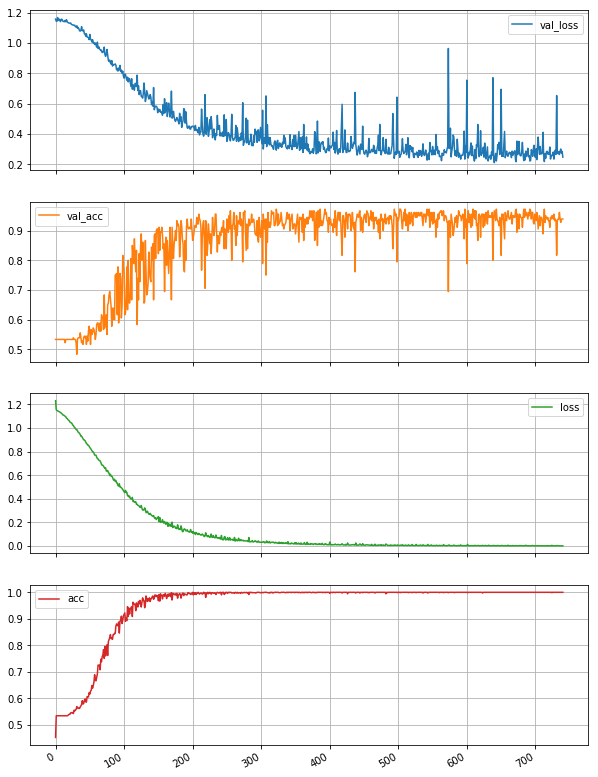

In [116]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [117]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "other"
    elif encodedLabel == 1:
        return "fizz"
    elif encodedLabel == 2:
        return "buzz"
    elif encodedLabel == 3:
        return "fizzbuzz"

In [118]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))

    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "asishkak")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50288695")

predictedTestLabel.insert(0,"")
predictedTestLabel.insert(1,"")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel
output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')



Errors: 0  Correct :100
Testing Accuracy: 100.0
